In [1]:
import requests
from bs4 import BeautifulSoup
import psycopg2
from datetime import datetime


<!doctype html><html lang="pt-BR"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>playstation - Pesquisa Google</title><script nonce="2PBd3uUHaL-DCtKAZo63cA">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a=c==="1"||c==="q"&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if(a.tagName==="A"){a=a.getAttribute("data-nohref")==="1";break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){window.google=window.google||{};var a=window.performance&&window.performance.timing&&"navigationStart"in window.performance.timing,b=google.stvsc&&google.stvsc.ns,c=a?b||window.performance.timing.navigationStart:void 0,d=google.stvsc&&google.stvsc.rs,f=a?d||
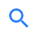
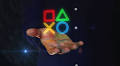
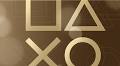
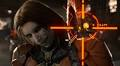
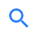
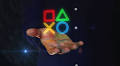
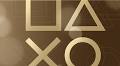
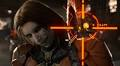
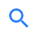
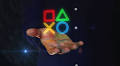
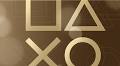
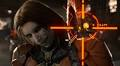
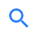
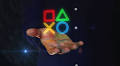
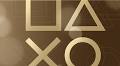
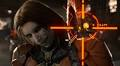
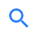
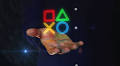
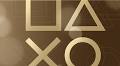
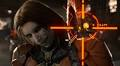
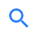
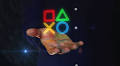
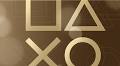
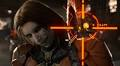
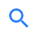
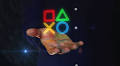
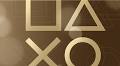
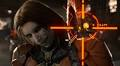
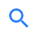
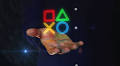
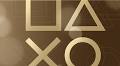
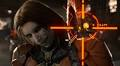
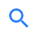
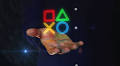
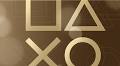
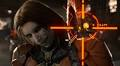
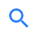
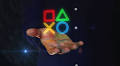
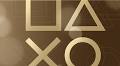
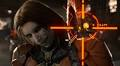
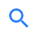
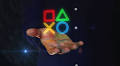
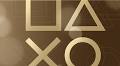
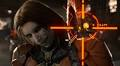
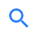
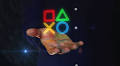
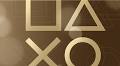
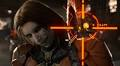
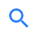
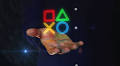
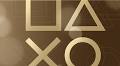
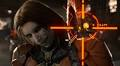
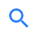
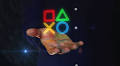
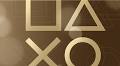
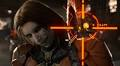
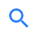
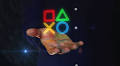
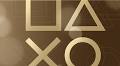
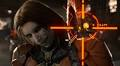
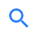
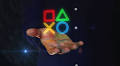
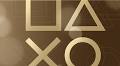
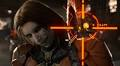
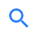
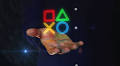
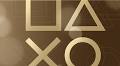
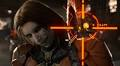
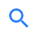
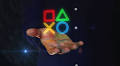
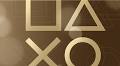
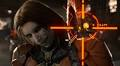
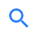
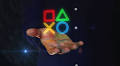
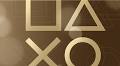
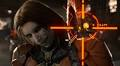
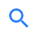
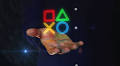
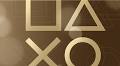
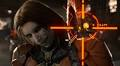
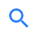
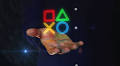
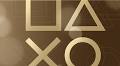
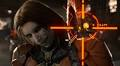
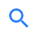
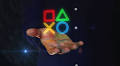
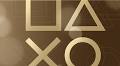
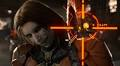
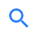
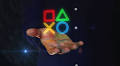
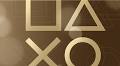
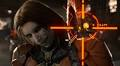
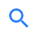
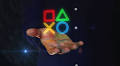
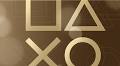
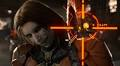
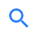
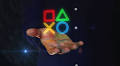
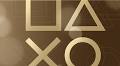
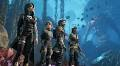
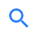
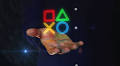
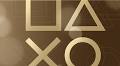
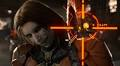
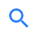
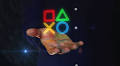
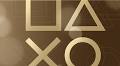
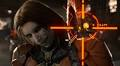
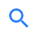
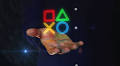
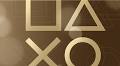
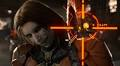
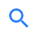
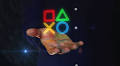
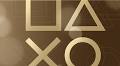
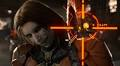
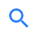
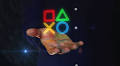
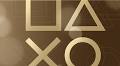
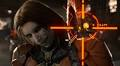
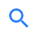
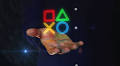
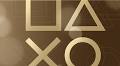
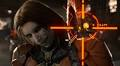
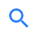
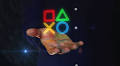
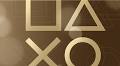
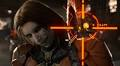
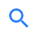
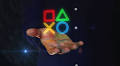
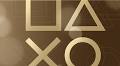
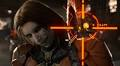
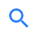
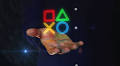
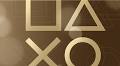
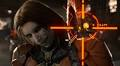
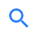
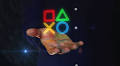
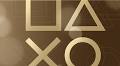
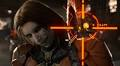
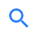
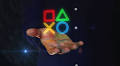
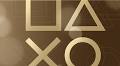
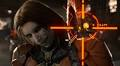
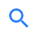
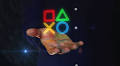
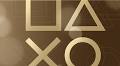
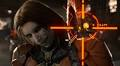
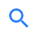
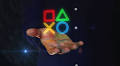
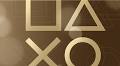
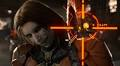
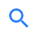
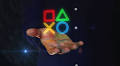
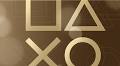
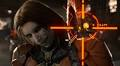
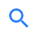
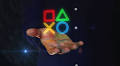
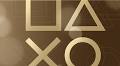
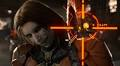
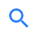
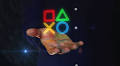
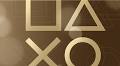
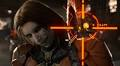
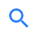
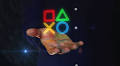
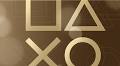
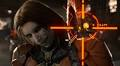
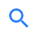
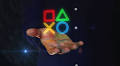
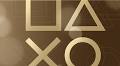
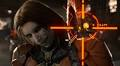
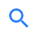
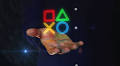
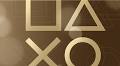
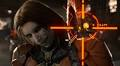
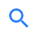
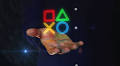
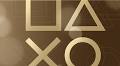
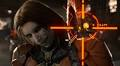
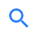
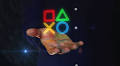
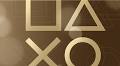
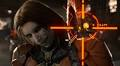
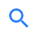
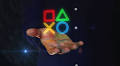
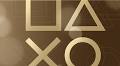
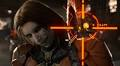
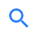
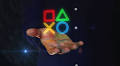
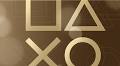
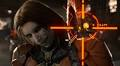
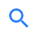
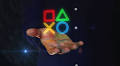
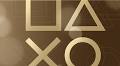
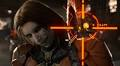

KeyboardInterrupt: 

In [3]:

# Configurações do banco de dados
DB_HOST = 'localhost'
DB_NAME = 'postgres'
DB_USER = 'postgres'
DB_PASS = '12345678'
paginas = 1
# Função para conectar ao banco de dados
def conectar_db():
    conn = psycopg2.connect(
        host=DB_HOST,
        database=DB_NAME,
        user=DB_USER,
        password=DB_PASS
    )
    return conn

# Função para buscar notícias
def buscar_noticias(termo, paginas):
    noticias = []

    for i in range(paginas):
        url = f"https://www.google.com/search?q={termo}&tbm=nws&start={i*10}"
        headers = {'User-Agent': 'Mozilla/5.0'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        print(f"{response.text}")
    
    
        for item in soup.find_all("div", {"class": "X7NTVe"}):
            print(f"{item.text}")
            # print(f"{item.find('h3').text}")
            # print(f"{item.find('a')['href']}")
            titulo = item.find('h3').text
            link = item.find('a')['href']
            noticias.append((titulo, link, datetime.now().date()))
    i = i + 1;            
    
    return noticias

# Função para salvar notícias no banco de dados
def salvar_noticias(noticias):
    conn = conectar_db()
    cursor = conn.cursor()
    
    for titulo, url, data in noticias:
        cursor.execute(
            "INSERT INTO news (title, url, data) VALUES (%s, %s, %s)",
            (titulo, url, data)
        )
    
    conn.commit()
    cursor.close()
    conn.close()

# Main
if __name__ == "__main__":
    termo_de_busca = "playstation"  # Altere o termo de busca conforme necessário      
    while True:        
        try:
            paginas=+1
            noticias = buscar_noticias(termo_de_busca, paginas)
            salvar_noticias(noticias)
            print(f"{paginas}")
            print(f"{len(noticias)} notícias salvas com sucesso.")
        except Exception as e:
            print("Occoreu um erro")

